In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate

In [2]:
data=pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
X=data.drop('species',axis=1)
y=data['species']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [10]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (112, 4) (38, 4)


In [11]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [12]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

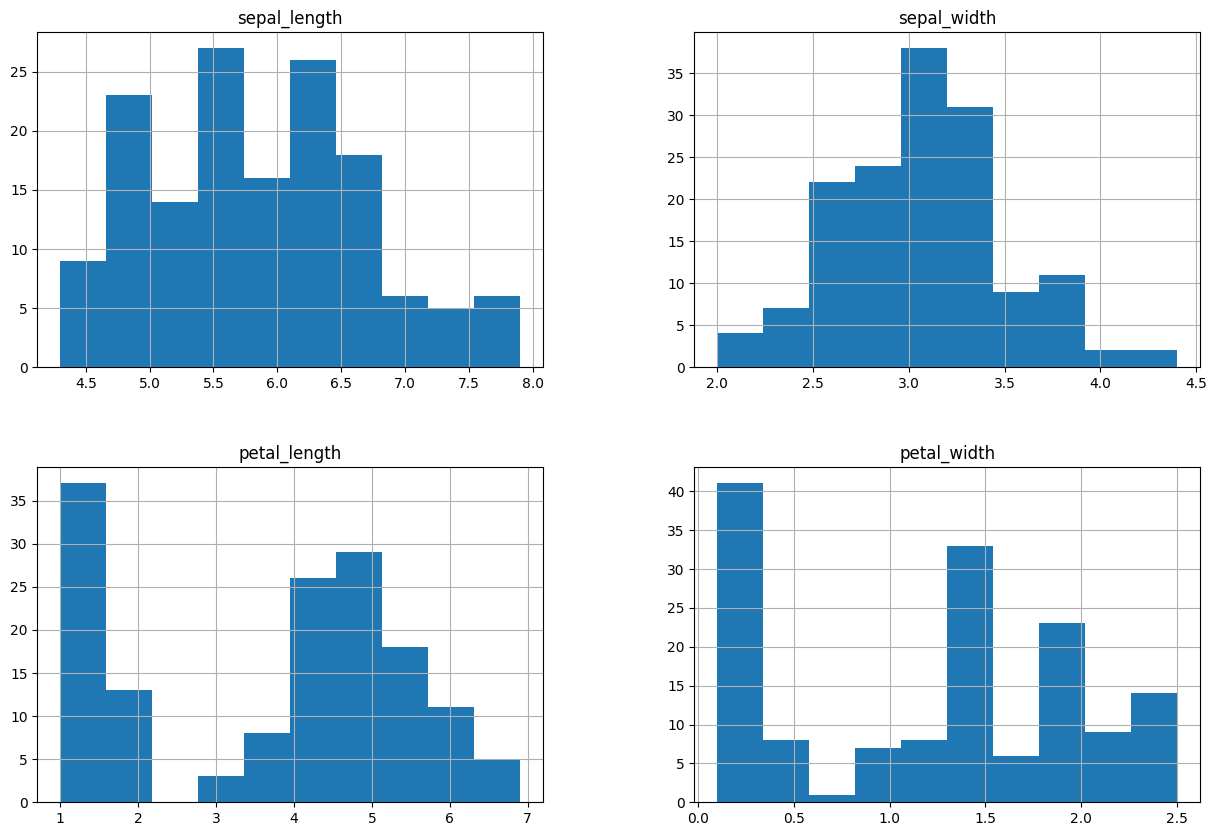

In [13]:
data.hist(figsize=(15,10))

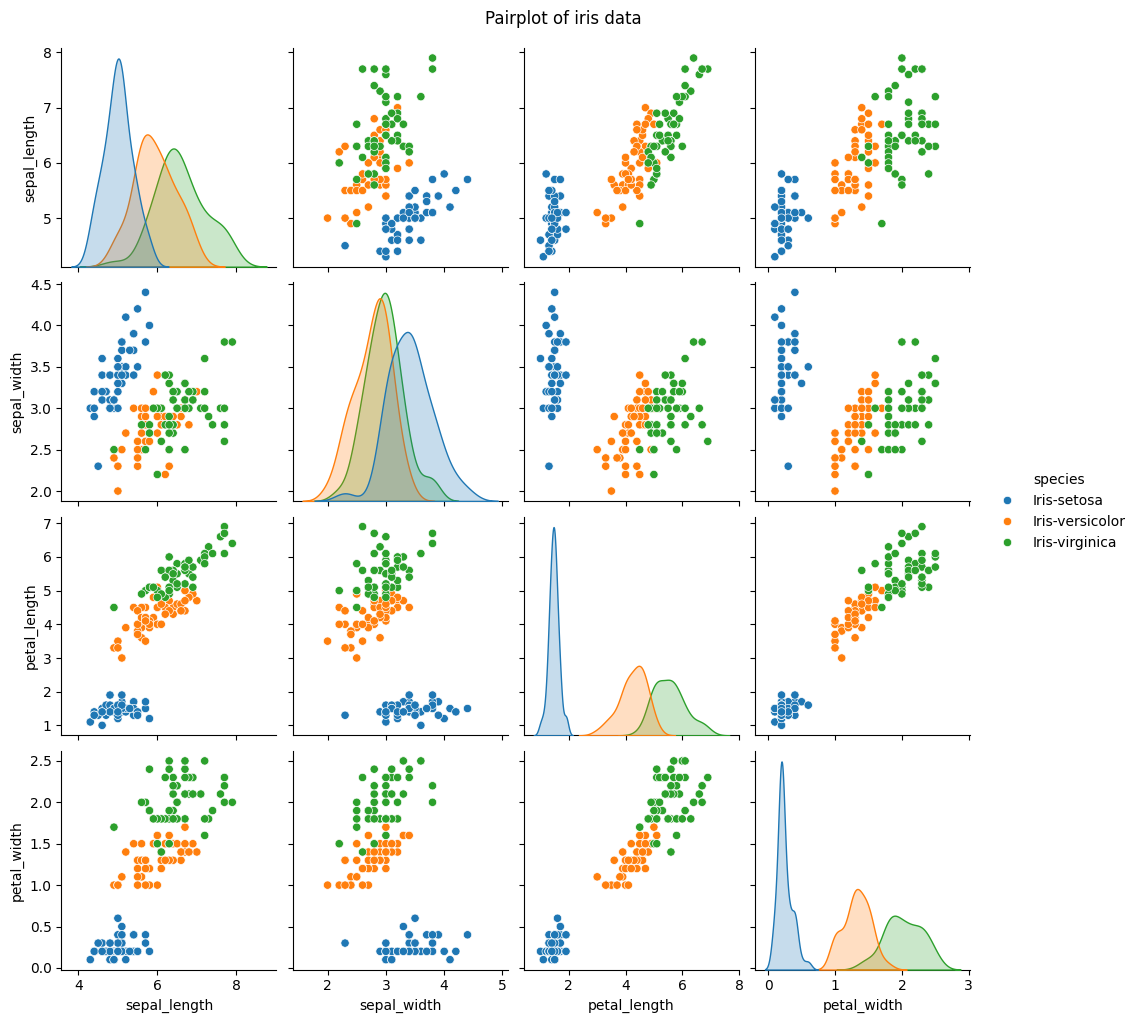

In [14]:
sn.pairplot(data,hue='species',markers='o')
plt.suptitle('Pairplot of iris data',y=1.02)
plt.show()

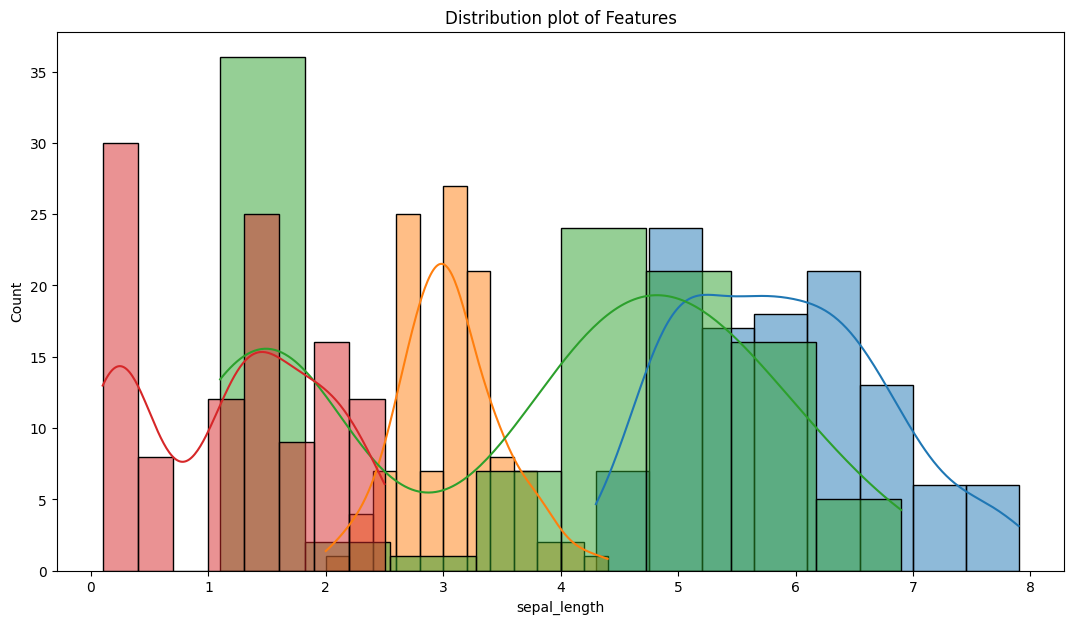

In [15]:
plt.figure(figsize=(13,7))
for i in X_train.columns:
    sn.histplot(X_train[i],kde=True)
plt.title('Distribution plot of Features')
plt.show()

In [16]:
x=data.drop(columns='species')
y=data['species']

In [17]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [19]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [21]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
kn_model= KNeighborsClassifier(n_neighbors=3,weights='uniform')
kn_model.fit(X_train,y_train)
pred1_kn=kn_model.predict(X_train)

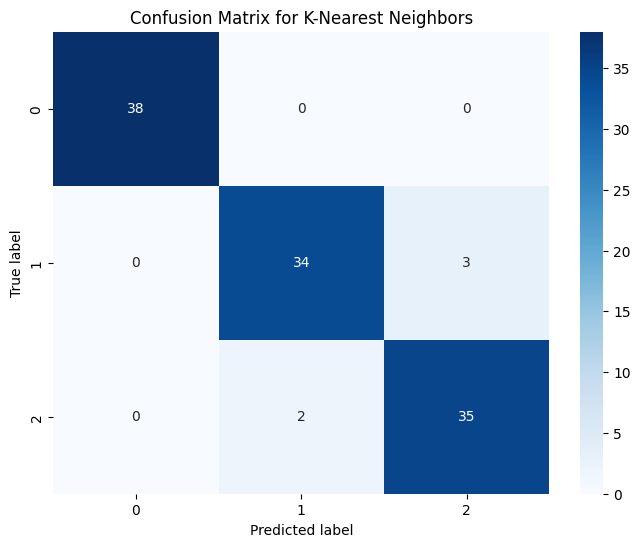

In [23]:
plt.figure(figsize=(8,6))
sn.heatmap(confusion_matrix(y_train,pred1_kn),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [24]:
accuracy=model.score(X_train,y_train)*100
print("Accuracy",accuracy)

Accuracy 97.32142857142857


In [25]:
from sklearn.tree import DecisionTreeClassifier
dec_model=DecisionTreeClassifier()

In [26]:
dec_model.fit(X_train,y_train)
pred1_dec=dec_model.predict(X_train)

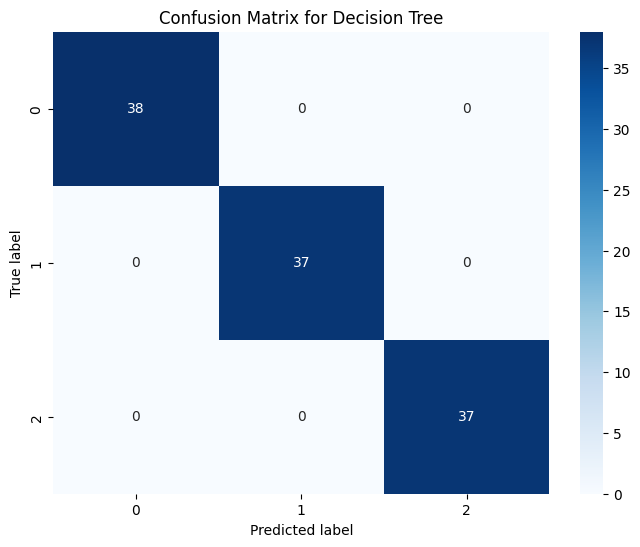

In [27]:
plt.figure(figsize=(8,6))
sn.heatmap(confusion_matrix(y_train,pred1_dec),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [28]:
accuracy=model.score(X_train,y_train)*100
print("Accuracy",accuracy)

Accuracy 97.32142857142857


In [29]:
from sklearn.ensemble import RandomForestClassifier
raf_model=RandomForestClassifier()


In [30]:
raf_model.fit(X_train,y_train)
pred1_raf=raf_model.predict(X_train)

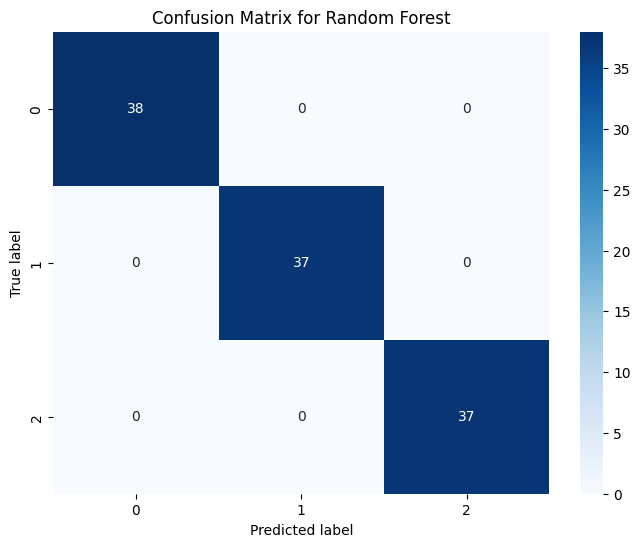

In [31]:
plt.figure(figsize=(8,6))
sn.heatmap(confusion_matrix(y_train,pred1_raf),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [32]:
accuracy=model.score(X_train,y_train)*100
print("Accuracy",accuracy)

Accuracy 97.32142857142857


In [33]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
pred_log=log_model.predict(X_train)

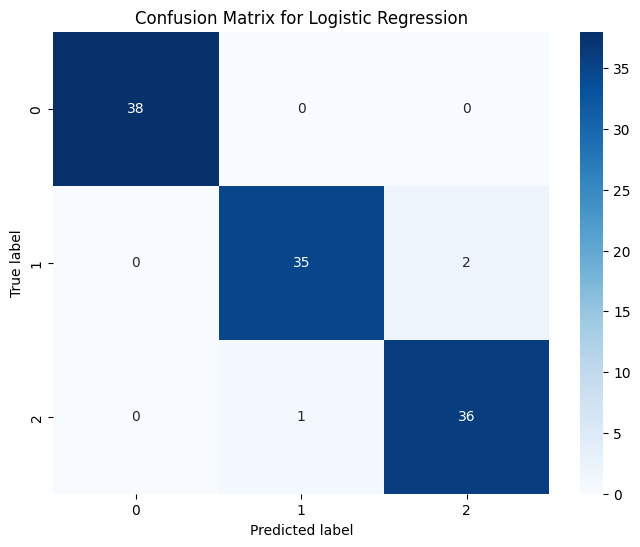

In [34]:
plt.figure(figsize=(8,6))
sn.heatmap(confusion_matrix(y_train,pred_log),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

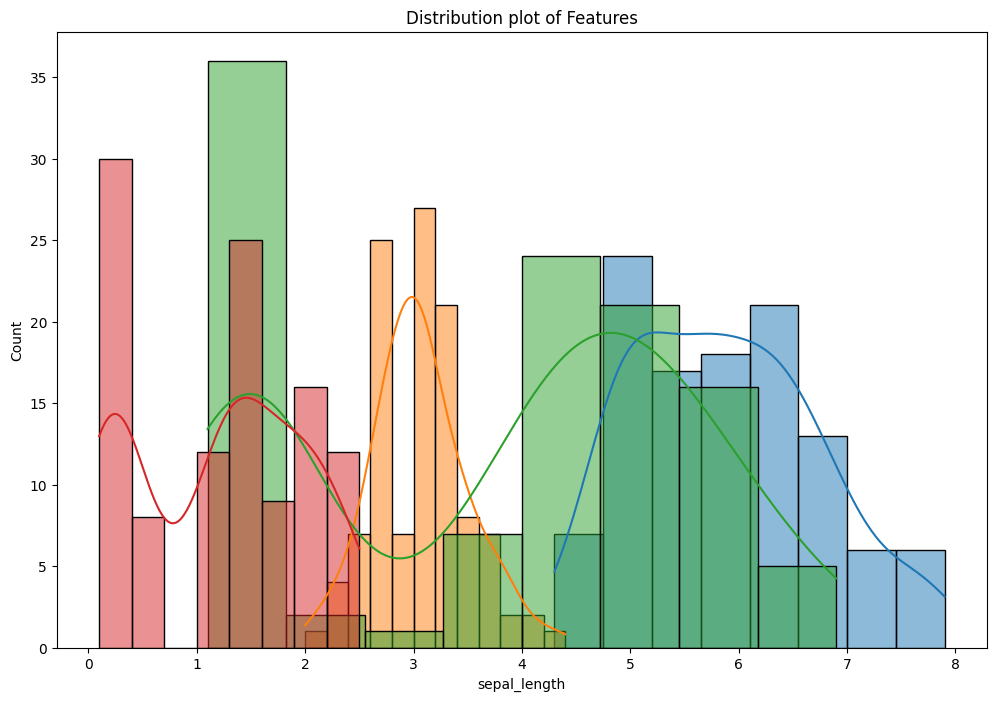

In [35]:
plt.figure(figsize=(12,8))
for i in X_train.columns:
    sn.histplot(X_train[i],kde=True)
plt.title('Distribution plot of Features')
plt.show()

In [36]:
model_results=[
    ["K-Nearest Neighbors",accuracy_score(pred1_kn,y_train)],
    ["Decision Tree",accuracy_score(pred1_dec,y_train)],
    ["Random Forest",accuracy_score(pred1_raf,y_train)],
    ["Logistic Regression",accuracy_score(pred_log,y_train)]
]
print("\nModel Comparison:")
print(tabulate(model_results,headers=["Model","Accuracy"],tablefmt="grid"))


Model Comparison:
+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| K-Nearest Neighbors |   0.955357 |
+---------------------+------------+
| Decision Tree       |   1        |
+---------------------+------------+
| Random Forest       |   1        |
+---------------------+------------+
| Logistic Regression |   0.973214 |
+---------------------+------------+
